In [2]:
pip install tensorflow keras matplotlib seaborn


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/drive/MyDrive/ACV/Dog Breed Classification/train"
val_dir = "/content/drive/MyDrive/ACV/Dog Breed Classification/val"

img_size = 224
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(train_dir, target_size=(img_size, img_size),
                                        batch_size=batch_size, class_mode='categorical')
val_gen = datagen.flow_from_directory(val_dir, target_size=(img_size, img_size),
                                      batch_size=batch_size, class_mode='categorical')


Found 210 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


In [4]:
from tensorflow.keras.applications import MobileNet, MobileNetV2, MobileNetV3Small
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

def build_model(base_model):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(train_gen.num_classes, activation='softmax')
    ])
    return model


In [5]:
base_v1 = MobileNet(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_v2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_v3 = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
from tensorflow.keras.optimizers import Adam

def compile_and_train(model, name):
    model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_gen, epochs=10, validation_data=val_gen)
    model.save(f"mobilenet_{name}.h5")
    return history


In [7]:
history_v1 = compile_and_train(build_model(base_v1), "v1")
history_v2 = compile_and_train(build_model(base_v2), "v2")
history_v3 = compile_and_train(build_model(base_v3), "v3")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 76s 8s/step - accuracy: 0.5360 - loss: 1.0439 - val_accuracy: 1.0000 - val_loss: 0.0541
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 77s 6s/step - accuracy: 0.9862 - loss: 0.0571 - val_accuracy: 1.0000 - val_loss: 0.0138
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0139
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0133
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - accuracy: 1.0000 - loss: 9.7356e-04 - val_accuracy: 1.0000 - val_loss: 0.0121
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 46s 6s/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 6s/step - accuracy: 1.0000 - loss: 4.9795e-04 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - accuracy: 1.0000 - loss: 6.0511e-04 - val_accuracy: 1.0000 - val_loss: 0.0

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 99s 9s/step - accuracy: 0.7403 - loss: 0.4855 - val_accuracy: 0.9474 - val_loss: 0.1919
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 7s/step - accuracy: 1.0000 - loss: 0.0242 - val_accuracy: 0.9474 - val_loss: 0.1404
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 7s/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.9474 - val_loss: 0.1401
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 49s 7s/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9474 - val_loss: 0.1400
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 46s 7s/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9474 - val_loss: 0.1449
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 79s 6s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9474 - val_loss: 0.1427
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 7s/step - accuracy: 1.0000 - loss: 5.8877e-04 - val_accuracy: 0.9474 - val_loss: 0.1381
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - accuracy: 1.0000 - loss: 7.3981e-04 - val_accuracy: 0.9474 - val_loss: 0.1337


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.7250 - loss: 0.6023 - val_accuracy: 0.4211 - val_loss: 0.7189
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9463 - loss: 0.3037 - val_accuracy: 0.4211 - val_loss: 0.7257
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9819 - loss: 0.1755 - val_accuracy: 0.4211 - val_loss: 0.7320
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9946 - loss: 0.1194 - val_accuracy: 0.4211 - val_loss: 0.7384
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 1.0000 - loss: 0.0707 - val_accuracy: 0.4211 - val_loss: 0.7459
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 1.0000 - loss: 0.0413 - val_accuracy: 0.4211 - val_loss: 0.7536
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 1.0000 - loss: 0.0324 - val_accuracy: 0.4211 - val_loss: 0.7596
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 1.0000 - loss: 0.0173 - val_accuracy: 0.4211 - val_loss: 0.7649
Epoch 9/

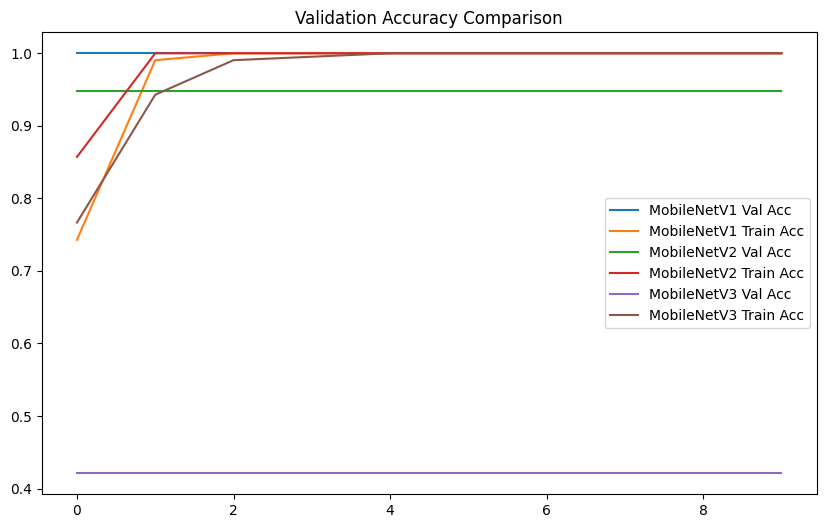

In [8]:
import matplotlib.pyplot as plt

def plot_history(history, label):
    plt.plot(history.history['val_accuracy'], label=f'{label} Val Acc')
    plt.plot(history.history['accuracy'], label=f'{label} Train Acc')

plt.figure(figsize=(10, 6))
plot_history(history_v1, 'MobileNetV1')
plot_history(history_v2, 'MobileNetV2')
plot_history(history_v3, 'MobileNetV3')
plt.legend()
plt.title("Validation Accuracy Comparison")
plt.show()
